# Capstone 2: Obesity in America
## Exploratory Data Analysis

The goal of this step is to explore the data relationships of all of the features and understand how the features compare to the response variable. The response variable we will be looking at is percent obesity. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
cd data

/Users/erinquense/springboard/Capstone2Project/data


In [4]:
df = pd.read_csv('df_wrangled.csv', index_col=0)

In [5]:
df.head(3)

,Year,Location,Age,% who are overweight,% who have obesity,% who are moderately active,% who are moderately active and strength train,% who are vigorously after,% who strength train,% who no physical activity,% less than 1 fruit/day,% less than 1 vegetable/day,Education,Gender,Income,Race/Ethnicity,Total
0,2011,Alaska,18 - 24,32.0,19.8,62.8,34.9,32.4,51.9,16.1,45.0,29.1,NaN,NaN,NaN,NaN,NaN
1,2011,Alaska,25 - 34,38.7,23.5,57.6,27.0,35.7,36.4,18.1,43.6,18.8,NaN,NaN,NaN,NaN,NaN
2,2011,Alaska,35 - 44,38.9,29.5,55.3,22.2,32.3,30.8,21.1,42.3,18.4,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')



#### Question: What is the spread of representation for each state?  

Not every state, for every year has data reported for every feature in the data set. 

By performing value_counts on the Location column of dataframe, it shows that Washington state provides the highest percentage of data, while the Virgin Islands are the least represented. National represents the national averages. 

In [7]:
df.Location.value_counts(normalize=True)

National                0.020606
Washington              0.020115
Maryland                0.019747
Colorado                0.019747
California              0.019747
Massachusetts           0.019625
Arizona                 0.019625
New Jersey              0.019625
Minnesota               0.019625
Ohio                    0.019625
Utah                    0.019502
Florida                 0.019502
South Carolina          0.019502
North Carolina          0.019502
Nevada                  0.019379
Kansas                  0.019379
Connecticut             0.019379
Michigan                0.019379
Nebraska                0.019379
New Mexico              0.019379
Virginia                0.019257
Hawaii                  0.019134
Texas                   0.019134
Georgia                 0.019011
Oklahoma                0.019011
Alaska                  0.018889
Indiana                 0.018889
New York                0.018889
Kentucky                0.018766
Rhode Island            0.018766
Wisconsin 

#### Question: What is the maximum and minimum reported % obese?  What is the average?

To answer this I will look at the descriptive statistics, and will apply it to the entire dataframe to get an overall idea, rather than obesity alone. 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
% who are overweight,8127.0,34.926467,4.673879,10.1,32.4,35.4,37.90,58.3
% who have obesity,8127.0,28.929384,6.929260,0.9,25.4,29.4,33.25,60.4
% who are moderately active,3994.0,50.202479,7.547899,24.0,45.2,50.3,55.30,77.6
% who are moderately active and strength train,3991.0,20.094287,5.643522,2.2,16.3,19.7,23.40,46.5
% who are vigorously after,3991.0,31.250388,6.088415,12.5,27.1,31.1,35.10,64.9
% who strength train,4003.0,29.640919,7.141949,3.3,24.9,29.2,33.80,61.0
% who no physical activity,8119.0,25.560488,8.053705,2.5,20.0,25.1,30.70,60.5
% less than 1 fruit/day,3998.0,40.174562,6.975817,9.6,35.4,40.0,44.90,63.0
% less than 1 vegetable/day,3996.0,23.804555,6.774396,3.6,19.2,23.1,27.90,50.8


Of the 8,127 observations in the dataset, the average (or mean) reported % obese in 28.93%.  The minimum reported is 0.9% and the maximum is 60.4, although 75% of the reported % obese is less than 33.25%. The min and max is a pretty big range.  

The histogram below is a visualization of the statistical description of the response variable, % obese, with the mean represented as a dotted line. It appears to be a normal distribution. 

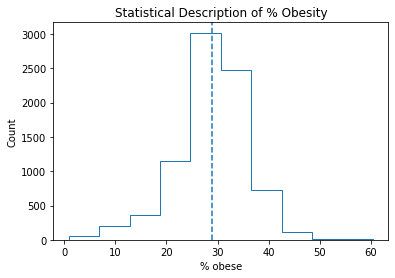

In [9]:
plt.hist(df['% who have obesity'], histtype='step')
_ = plt.axvline(df['% who have obesity'].mean(), linestyle='dashed')
plt.xlabel('% obese')
plt.ylabel('Count')
plt.title('Statistical Description of % Obesity')
_ = plt.show()

#### Question: What is difference in overall % obesity in America between 2011 and 2016? 

The scatter plot below shows us that between 2011 and 2016, the overall rate of obesity has increased from 27.4% to 29.6%

In [10]:
national = df[df['Location'] == 'National']
national = national[national['Total'] == 'Total']

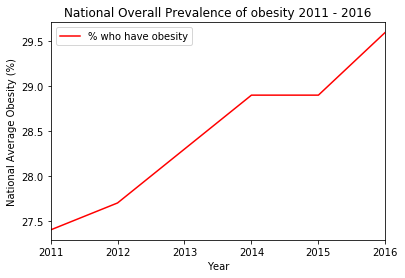

In [11]:
national.plot.line(x='Year', y='% who have obesity', c='r')
plt.rcParams['figure.figsize']=(10,10)
plt.xlabel('Year')
plt.ylabel('National Average Obesity (%)')
plt.title('National Overall Prevalence of obesity 2011 - 2016')
plt.show()

In [12]:
df['% who have obesity'].isnull().value_counts()

False    8127
True       26
Name: % who have obesity, dtype: int64

In [13]:
df['% who have obesity'].fillna((df['% who have obesity'].mean()), inplace=True)

In [14]:
df['% who have obesity'].isnull().value_counts()

False    8153
Name: % who have obesity, dtype: int64

#### Question: Considering the large range in reported obesity identified earlier, which states have the highest counts of least and highest rate of % obesity?

To define a range for highest and lowest reported obesity I will use the 25th and 75th percentiles identified earlier in the descriptive statistics. Greater than 33.25% will be considered a high rate, and less than 25.4% will be considered a low rate. 

In [15]:
highobese = df.loc[df['% who have obesity'] > 33.25]
lowobese = df.loc[df['% who have obesity'] < 25.4]

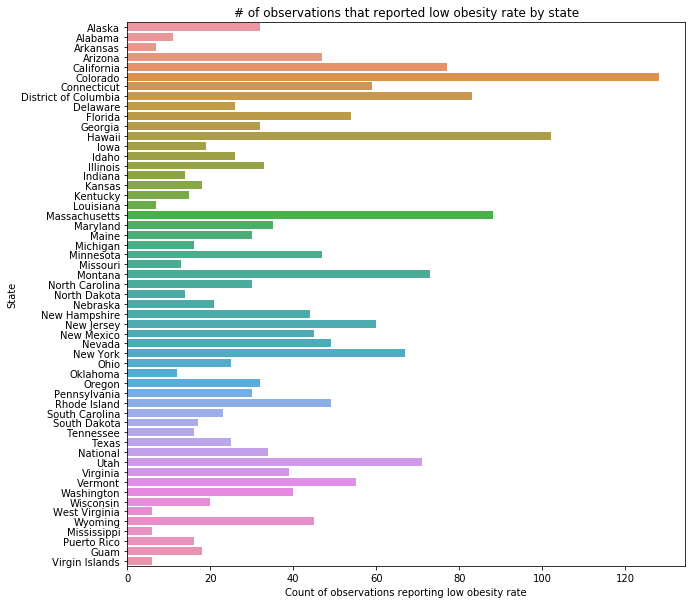

In [16]:
_ = sns.countplot(y='Location', data=lowobese)
plt.title('# of observations that reported low obesity rate by state')
plt.ylabel('State')
plt.xlabel('Count of observations reporting low obesity rate')
plt.rcParams['figure.figsize']=(20,20)

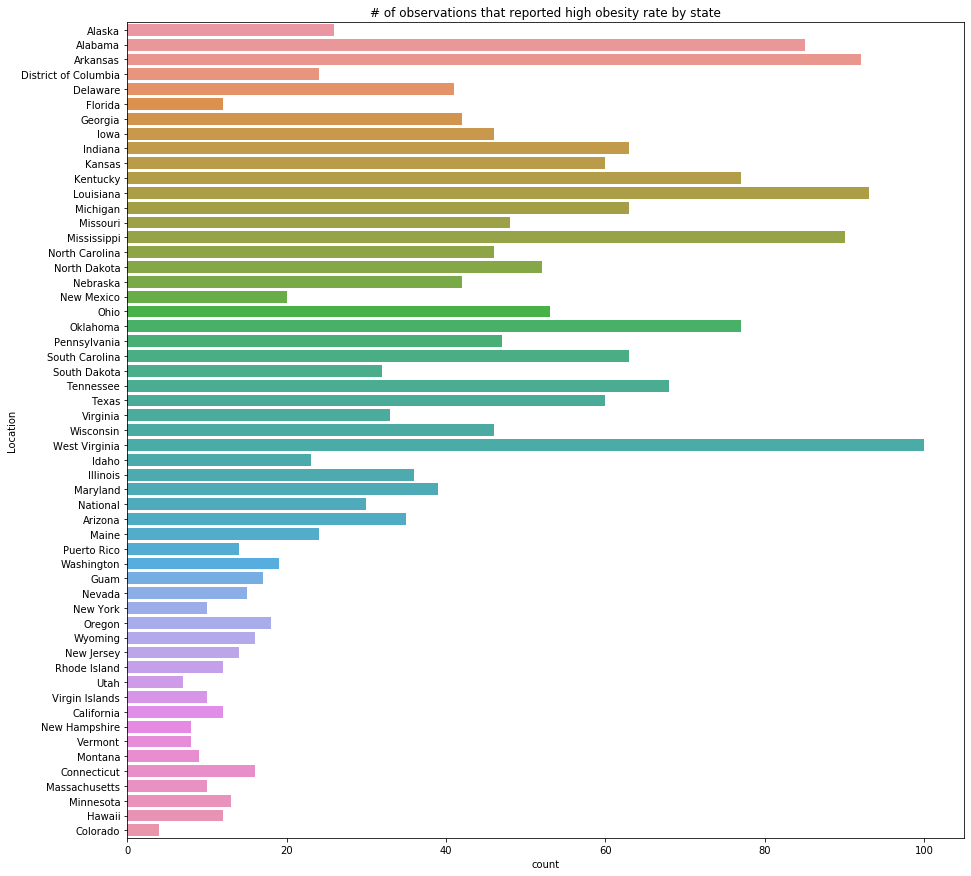

In [17]:
plt.rcParams['figure.figsize']=(15,15)
plt.title('# of observations that reported high obesity rate by state')
plt.ylabel('State')
plt.xlabel('Count of observations reporting high obesity rate')
_ = sns.countplot(y='Location', data=highobese)

#### Question: How do the features of the dataset relate to the response variable?

Boxplots show the distribution of data as well as outliers.  I will create boxplots for each categorical feature compared to obesity. 

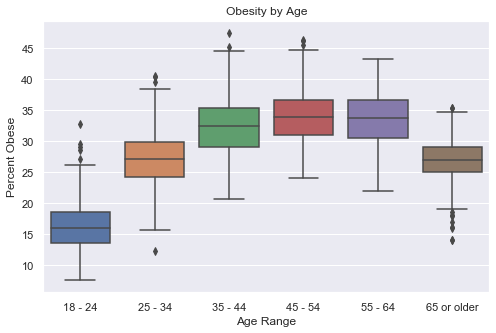

In [18]:
sns.set()
plt.rcParams['figure.figsize']=(8,5)
sns.boxplot(x='Age', y='% who have obesity', data=df)
plt.xlabel('Age Range')
plt.ylabel('Percent Obese')
plt.title('Obesity by Age')
plt.show()

The above boxplot shows that the lowest rate of obesity is between 18 - 24, the highest between 25 and 64, and then appears to decrease again at 65 and older. 

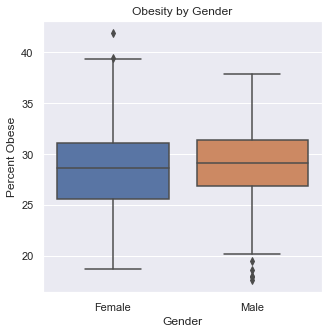

In [19]:
sns.set()
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(x='Gender', y='% who have obesity', data=df)
plt.xlabel('Gender')
plt.ylabel('Percent Obese')
plt.title('Obesity by Gender')
plt.show()

There does not appear to be a big difference between rate of obesity in males and females. 

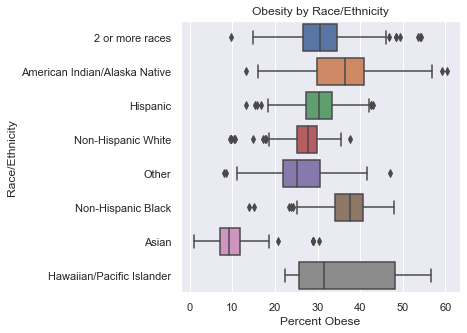

In [20]:
sns.set()
sns.boxplot(x='% who have obesity', y='Race/Ethnicity', data=df)
plt.xlabel('Percent Obese')
plt.ylabel('Race/Ethnicity')
plt.title('Obesity by Race/Ethnicity')
plt.show()

Race/Ethnicity does appear to have differences in rate of obesity.  The boxplot above shows Asian to have an overall lower average of % obese while Non-Hispanic Black and American Indian/Alaska Native have a higher overall average. 

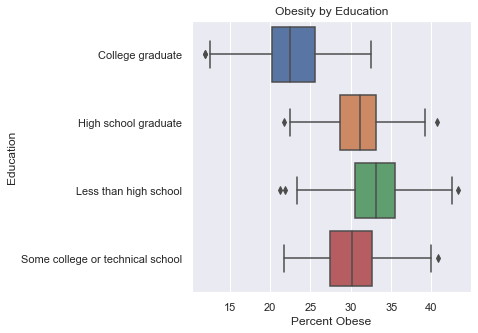

In [21]:
sns.set()
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(x='% who have obesity', y='Education', data=df)
plt.xlabel('Percent Obese')
plt.ylabel('Education')
plt.title('Obesity by Education')
plt.show()

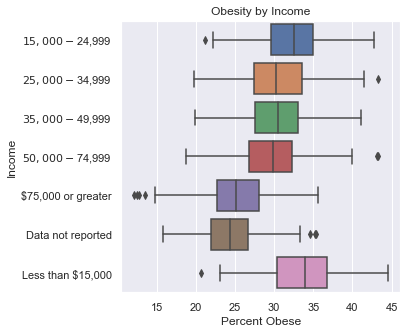

In [22]:
sns.set()
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(x='% who have obesity', y='Income', data=df)
plt.xlabel('Percent Obese')
plt.ylabel('Income')
plt.title('Obesity by Income')
plt.show()

It also appears that income varies with income. It appears that on average, an income of less than $15,000 correlates with higher reported rate of obesity. 

#### Question:  Considering the variation in rate of obesity by Race/Ethnicity,  which Race/Ethnicity had the least and most observations of high and low rates of obesity, as defined earlier. 

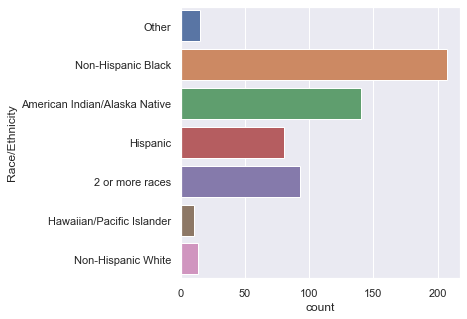

In [23]:
_ = sns.countplot(y='Race/Ethnicity', data=highobese)

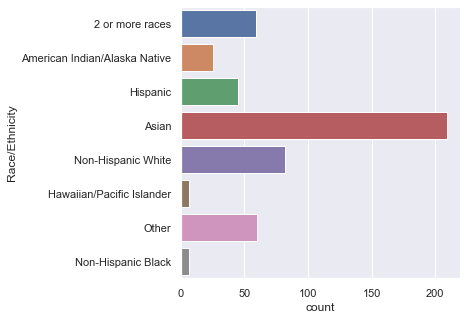

In [24]:
_ = sns.countplot(y='Race/Ethnicity', data=lowobese)

It appears that the category Non-Hispanic Black has the highest rate of reported higher % obesity and Asian has the highest rate of reported lower % obesity. 

#### Question:  Which features are most highly correlated with the response variable?

To answer this I will create a heat map that shows the correlations between variables. But first, it is necessary to change categorical variables into numeric ones. To reduce noise in the dataset, I will use dummy variables. 
 

In [25]:
dummy = pd.get_dummies(df['Age'])
df_dummy = pd.concat([df, dummy], axis = 1)
df_dummy = df_dummy.drop(['Age'], axis=1)

In [26]:
dummy = pd.get_dummies(df_dummy['Education'])
df_dummy = pd.concat([df_dummy, dummy], axis = 1)
df_dummy = df_dummy.drop(['Education'], axis=1)

In [27]:
dummy = pd.get_dummies(df_dummy['Gender'])
df_dummy = pd.concat([df_dummy, dummy], axis = 1)
df_dummy = df_dummy.drop(['Gender'], axis=1)

In [28]:
dummy = pd.get_dummies(df_dummy['Income'])
df_dummy = pd.concat([df_dummy, dummy], axis = 1)
df_dummy = df_dummy.drop(['Income'], axis=1)

In [29]:
dummy = pd.get_dummies(df_dummy['Race/Ethnicity'])
df_dummy = pd.concat([df_dummy, dummy], axis = 1)
df_dummy = df_dummy.drop(['Race/Ethnicity'], axis=1)

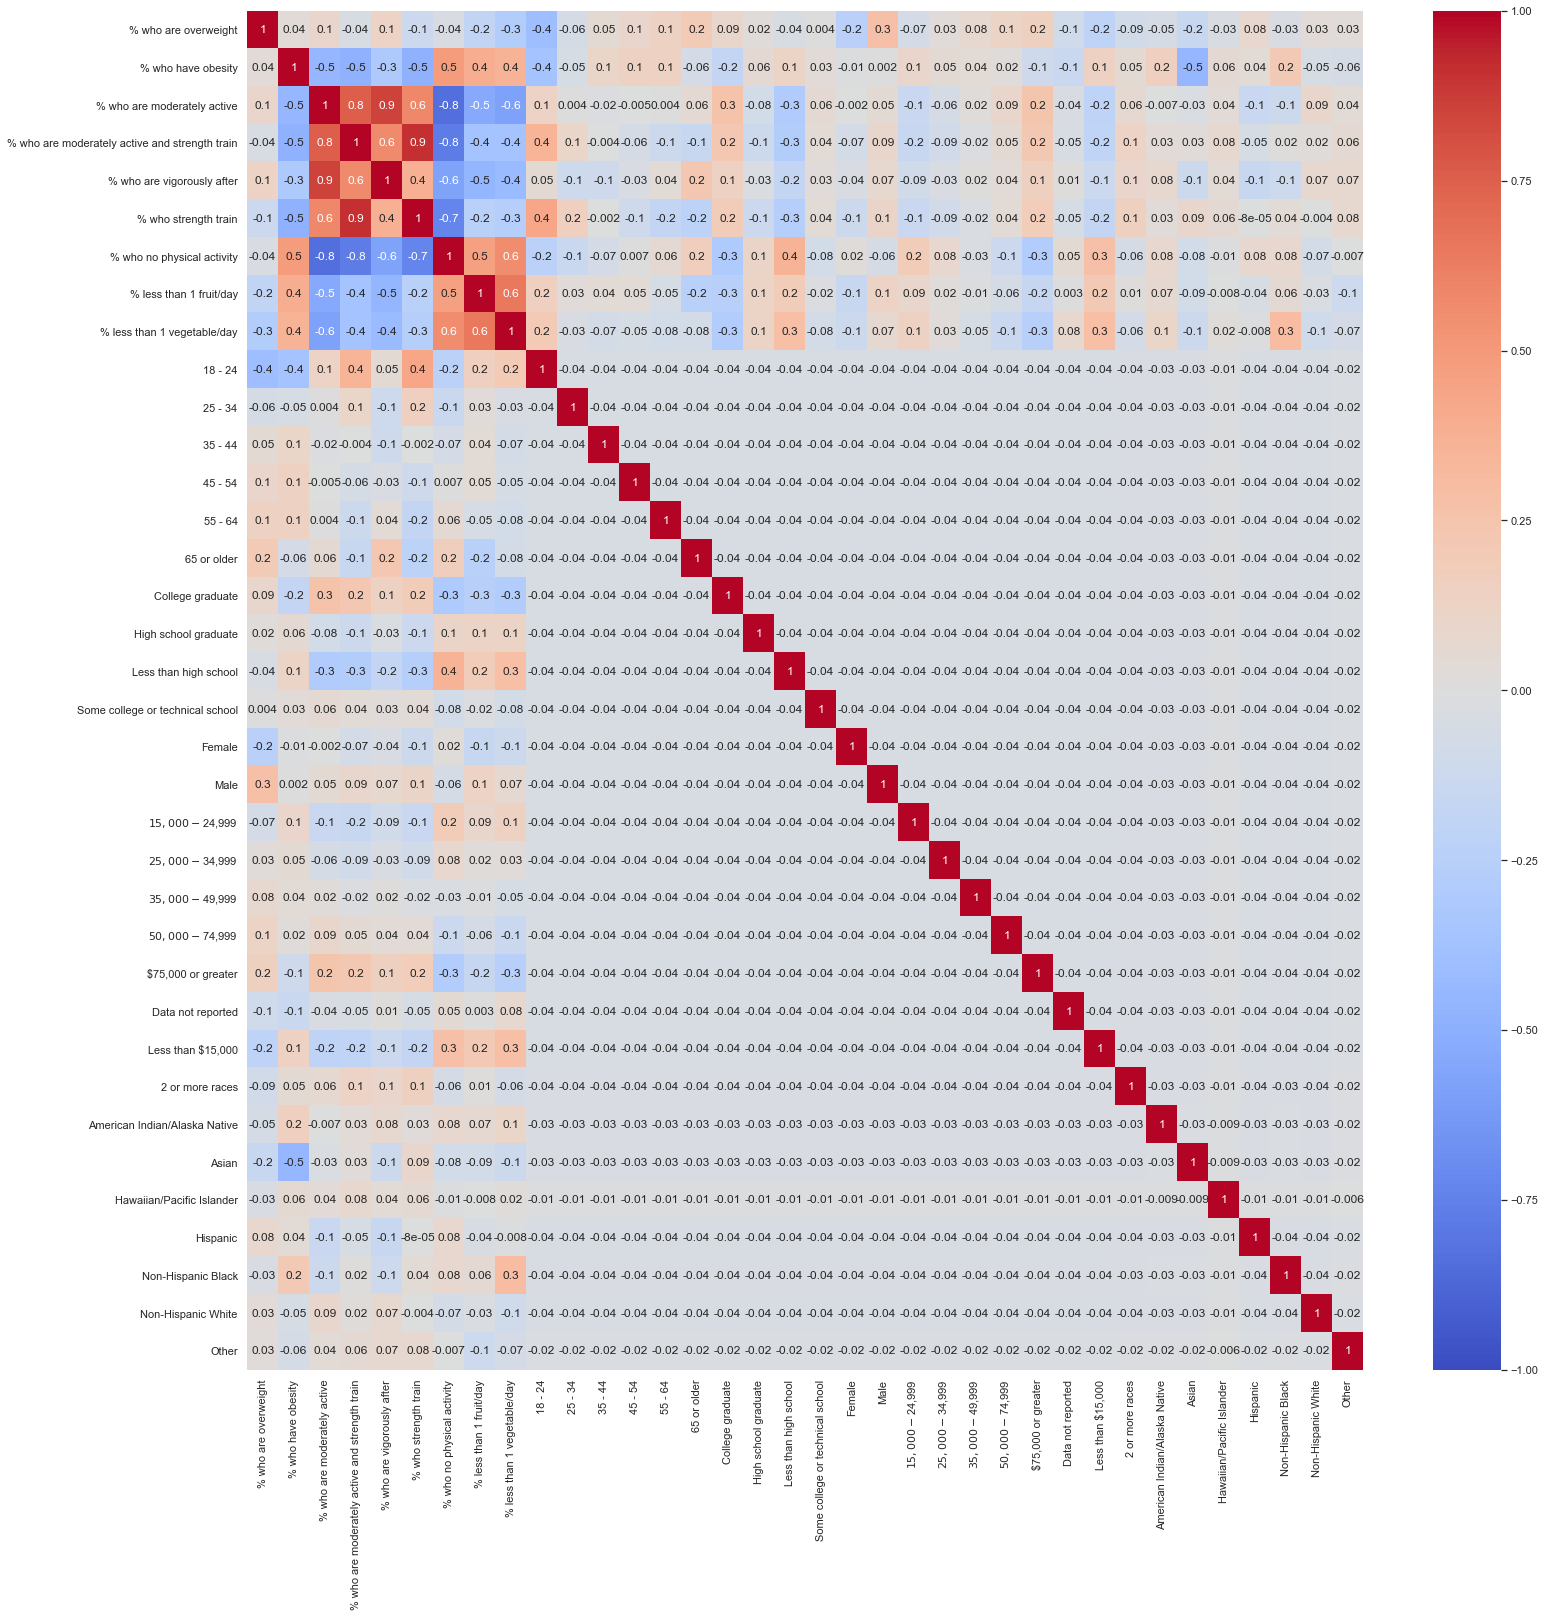

In [30]:
sns.set()
plt.rcParams['figure.figsize']=(25,25)
_ = sns.heatmap(df_dummy.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='coolwarm')

In [45]:
corr_matrix = df_dummy.drop(['% who have obesity'], axis=1).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [46]:
to_drop

['% who are moderately active and strength train',
 '% who are vigorously after',
 '% who strength train',
 '% who no physical activity',
 '% less than 1 vegetable/day']

In [47]:
df_dummy = df_dummy.drop(df[to_drop], axis=1)

The heatmap shows the correlations between variables, which shows us which features affect the response variable (obesity) the most. It shows that reports of no physical activity is most highly correlated with reported obesity, followed by report of less than 1 serving of fruit and less than 1 serving of vegetables per day. It also shows that strength training, some activity, and some activity + strength training are negatively correlated with reported obesity. And lastly, among many other things, the heatmaps shows a negative correlation between the categories 18 - 24 and Asian.  

After exploring some relationships between the features in the dataset and obesity, there is is a deeper understanding of the data. 

The next step is machine learning, where understanding correlations between features will be useful. 

There are still some missing values.  To account for these I will turn the continuous numerical variables into bins to include a category 'data not reported'. First I will fill all the NaN values with 0, since there are no 0's reported in the data. 

In [49]:
df_dummy['% who are overweight'].fillna(0, inplace=True)
df_dummy['% who have obesity'].fillna(0, inplace=True)
df_dummy['% who are moderately active'].fillna(0, inplace=True)
# df_dummy['% who are moderately active and strength train'].fillna(0, inplace=True)
# df_dummy['% who are vigorously after'].fillna(0, inplace=True)
# df_dummy['% who strength train'].fillna(0, inplace=True)
# df_dummy['% who no physical activity'].fillna(0, inplace=True)
df_dummy['% less than 1 fruit/day'].fillna(0, inplace=True)
# df_dummy['% less than 1 vegetable/day'].fillna(0, inplace=True)
df_dummy['Total'].fillna(0, inplace=True)

In [50]:
#binning overweight
bins = [-np.inf, 0, 10.1, 32.4, 35.4, 37.9,  np.inf]
labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
df_dummy['B_% who are overweight'] = pd.cut(df_dummy['% who are overweight'], 
                                         bins, labels = labels)


In [62]:
# #binning moderately active
bins = [-np.inf, 0, 24.0, 45.2, 50.3, 55.3,  np.inf]
labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
df_dummy['B_% who are moderately active'] = pd.cut(df_dummy['% who are moderately active'], 
                                         bins, labels = labels)

In [63]:
#binning moderately active and strength training
# bins = [-np.inf, 0, 2.2, 16.3, 19.7, 23.4,  np.inf]
# labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
# df_dummy['B_% who are moderately active and strength train'] = pd.cut(df_dummy['% who are moderately active and strength train'], 
#                                          bins, labels = labels)

In [64]:
# #binning vigorous
# bins = [-np.inf, 0, 12.5, 27.1, 31.1, 35.1,  np.inf]
# labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
# df_dummy['B_% who are vigorously after'] = pd.cut(df_dummy['% who are vigorously after'], 
#                                          bins, labels = labels)

In [65]:
# #binning strength training
# bins = [-np.inf, 0, 3.3, 24.9, 29.2, 33.8,  np.inf]
# labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
# df_dummy['B_% who strength train'] = pd.cut(df_dummy['% who strength train'], 
#                                          bins, labels = labels)

In [66]:
# #binning no physical activity
# bins = [-np.inf, 0, 2.5, 20.0, 25.1, 30.7,  np.inf]
# labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
# df_dummy['B_% who no physical activity'] = pd.cut(df_dummy['% who no physical activity'], 
#                                          bins, labels = labels)

In [67]:
# #binning < 1 vegetable
# bins = [-np.inf, 0, 3.6, 19.2, 23.1, 27.9,  np.inf]
# labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
# df_dummy['B_% less than 1 vegetable/day'] = pd.cut(df_dummy['% less than 1 vegetable/day'], 
#                                          bins, labels = labels)

In [68]:
#binning < 1 fruit
bins = [-np.inf, 0, 9.6, 35.4, 40.0, 44.9,  np.inf]
labels = ['No Data Reported', 'Very Low', 'Low', 'Medium', 'High', 'Very High']
df_dummy['B_% less than 1 fruit/day'] = pd.cut(df_dummy['% less than 1 fruit/day'], 
                                         bins, labels = labels)

In [72]:
df_dummy.head()

,Year,Location,% who are overweight,% who have obesity,% who are moderately active,% less than 1 fruit/day,Total,18 - 24,25 - 34,35 - 44,...,American Indian/Alaska Native,Asian,Hawaiian/Pacific Islander,Hispanic,Non-Hispanic Black,Non-Hispanic White,Other,B_% who are overweight,B_% who are moderately active,B_% less than 1 fruit/day
0,2011-01-01,Alaska,32.0,19.8,62.8,45.0,0,1,0,0,...,0,0,0,0,0,0,0,Low,Very High,Very High
1,2011-01-01,Alaska,38.7,23.5,57.6,43.6,0,0,1,0,...,0,0,0,0,0,0,0,Very High,Very High,High
2,2011-01-01,Alaska,38.9,29.5,55.3,42.3,0,0,0,1,...,0,0,0,0,0,0,0,Very High,High,High
3,2011-01-01,Alaska,43.3,29.2,56.2,35.8,0,0,0,0,...,0,0,0,0,0,0,0,Very High,Very High,Medium
4,2011-01-01,Alaska,38.9,33.4,58.2,33.3,0,0,0,0,...,0,0,0,0,0,0,0,Very High,Very High,Low


In [69]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 0 to 8152
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Year                              8153 non-null   datetime64[ns]
 1   Location                          8153 non-null   object        
 2   % who are overweight              8153 non-null   float64       
 3   % who have obesity                8153 non-null   float64       
 4   % who are moderately active       8153 non-null   float64       
 5   % less than 1 fruit/day           8153 non-null   float64       
 6   Total                             8153 non-null   object        
 7   18 - 24                           8153 non-null   uint8         
 8   25 - 34                           8153 non-null   uint8         
 9   35 - 44                           8153 non-null   uint8         
 10  45 - 54                           8153 non-null 

In [73]:
df_dummy.to_csv('df_for_preprocess.csv')